In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
from scipy.stats.mstats import mquantiles
from scipy.stats import iqr
import statistics as st

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix


import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path1="/content/drive/MyDrive/train_wn75k28.csv"

In [ ]:
df=pd.read_csv(path1)

In [ ]:
df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
df.columns

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [ ]:
df.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [ ]:
df['products_purchased'].value_counts()

2.0    8867
3.0    5024
1.0    3643
4.0     716
Name: products_purchased, dtype: int64

In [ ]:
df['products_purchased']=df['products_purchased'].fillna(0)

In [ ]:
df.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased          0
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [ ]:
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39161 non-null  int64         
 1   created_at            39161 non-null  datetime64[ns]
 2   campaign_var_1        39161 non-null  int64         
 3   campaign_var_2        39161 non-null  int64         
 4   products_purchased    39161 non-null  float64       
 5   signup_date           24048 non-null  datetime64[ns]
 6   user_activity_var_1   39161 non-null  int64         
 7   user_activity_var_2   39161 non-null  int64         
 8   user_activity_var_3   39161 non-null  int64         
 9   user_activity_var_4   39161 non-null  int64         
 10  user_activity_var_5   39161 non-null  int64         
 11  user_activity_var_6   39161 non-null  int64         
 12  user_activity_var_7   39161 non-null  int64         
 13  user_activity_va

In [ ]:
df['signup_date'] = np.where(df['signup_date'].isnull(), df['created_at'], df['signup_date'])

In [ ]:
from datetime import date

In [ ]:
df['delta_days']=df['signup_date']-df['created_at']

In [ ]:
df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,delta_days
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0,-99 days
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0,-104 days
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0,222 days
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0,-1185 days
4,5,2021-01-01,4,6,0.0,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0,-207 days


In [ ]:
df.columns

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy', 'delta_days'],
      dtype='object')

In [ ]:
df['delta_days'].value_counts()

0 days        15135
-129 days        47
80 days          43
63 days          41
-147 days        40
              ...  
-1520 days        1
-1225 days        1
-1187 days        1
-1697 days        1
-1830 days        1
Name: delta_days, Length: 1940, dtype: int64

In [ ]:
df=df.drop(['id','signup_date','created_at'],axis=1)

In [ ]:
df.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,delta_days
0,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0,-99 days
1,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,-104 days
2,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,222 days
3,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1185 days
4,4,6,0.0,0,0,0,0,0,0,1,0,0,0,1,0,0,-207 days


In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

mms = MinMaxScaler()
ss = StandardScaler()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   campaign_var_1        39161 non-null  int64          
 1   campaign_var_2        39161 non-null  int64          
 2   products_purchased    39161 non-null  float64        
 3   user_activity_var_1   39161 non-null  int64          
 4   user_activity_var_2   39161 non-null  int64          
 5   user_activity_var_3   39161 non-null  int64          
 6   user_activity_var_4   39161 non-null  int64          
 7   user_activity_var_5   39161 non-null  int64          
 8   user_activity_var_6   39161 non-null  int64          
 9   user_activity_var_7   39161 non-null  int64          
 10  user_activity_var_8   39161 non-null  int64          
 11  user_activity_var_9   39161 non-null  int64          
 12  user_activity_var_10  39161 non-null  int64          
 13  u

In [ ]:
df['delta_days']=df['delta_days'].astype(int)

In [ ]:
df['products_purchased']=df['products_purchased'].astype(int)

In [ ]:
df['products_purchased']=df['products_purchased'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   campaign_var_1        39161 non-null  int64
 1   campaign_var_2        39161 non-null  int64
 2   products_purchased    39161 non-null  int64
 3   user_activity_var_1   39161 non-null  int64
 4   user_activity_var_2   39161 non-null  int64
 5   user_activity_var_3   39161 non-null  int64
 6   user_activity_var_4   39161 non-null  int64
 7   user_activity_var_5   39161 non-null  int64
 8   user_activity_var_6   39161 non-null  int64
 9   user_activity_var_7   39161 non-null  int64
 10  user_activity_var_8   39161 non-null  int64
 11  user_activity_var_9   39161 non-null  int64
 12  user_activity_var_10  39161 non-null  int64
 13  user_activity_var_11  39161 non-null  int64
 14  user_activity_var_12  39161 non-null  int64
 15  buy                   39161 non-null  int64
 16  delt

In [ ]:
df_t = mms.fit_transform(df)

In [ ]:
df = pd. DataFrame(df_t,columns=['campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12',
       'buy', 'delta_days'])

In [ ]:
df.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,delta_days
0,0.000000,0.071429,0.50,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.00,0.0,0.0,0.805367
1,0.066667,0.000000,0.50,0.333333,0.0,1.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.00,0.0,0.0,0.803578
2,0.533333,0.142857,0.75,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.920215
3,0.333333,0.428571,0.50,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.416816
4,0.200000,0.357143,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.25,0.0,0.0,0.766726


In [ ]:
# Copy all the predictor variables into X dataframe
X = df.drop('buy', axis=1)

# Copy target into the y dataframe.  
y = df['buy']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [ ]:
import lightgbm as lgb

In [ ]:
def learning_rate_010_decay_power_099(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

def learning_rate_010_decay_power_0995(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.995, current_iter)
    return lr if lr > 1e-3 else 1e-3

def learning_rate_005_decay_power_099(current_iter):
    base_learning_rate = 0.05
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

In [ ]:
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto'}

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [ ]:
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

In [ ]:
gs.fit(X_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.897026
[200]	valid's auc: 0.898632
Early stopping, best iteration is:
[187]	valid's auc: 0.898711
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.893733
[200]	valid's auc: 0.896638
Early stopping, best iteration is:
[235]	valid's auc: 0.896736
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.895693
[200]	valid's auc: 0.897794
Early stopping, best iteration is:
[204]	valid's auc: 0.897826
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.937342
[200]	valid's auc: 0.93933
[300]	valid's auc: 0.93977
[400]	valid's auc: 0.939821
Early stopping, best iteration is:
[370]	valid's auc: 0.939837
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.935499
[200]	valid's auc: 0.937235
[300]	valid's auc: 0.937971
[400]	valid's

In [ ]:
opt_parameters = {'colsample_bytree': 0.55607, 'min_child_samples': 103, 'min_child_weight': 10.0, 'num_leaves': 22, 'reg_alpha': 2, 'reg_lambda': 1, 'subsample': 0.8939}

In [ ]:
clf_sw = lgb.LGBMClassifier(**clf.get_params())

In [ ]:
clf_sw.set_params(**opt_parameters)


LGBMClassifier(colsample_bytree=0.55607, metric='None', min_child_samples=103,
               min_child_weight=10.0, n_estimators=5000, n_jobs=4,
               num_leaves=22, random_state=314, reg_alpha=2, reg_lambda=1,
               subsample=0.8939)

In [ ]:
gs_sample_weight = GridSearchCV(estimator=clf_sw, 
                                param_grid={'scale_pos_weight':[1,2,6,12]},
                                scoring='roc_auc',
                                cv=5,
                                refit=True,
                                verbose=True)

In [ ]:
gs_sample_weight.fit(X_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs_sample_weight.best_score_, gs_sample_weight.best_params_))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.950796
Early stopping, best iteration is:
[75]	valid's auc: 0.95104
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.95111
Early stopping, best iteration is:
[113]	valid's auc: 0.951186
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.951798
Early stopping, best iteration is:
[100]	valid's auc: 0.951798
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.954102
Early stopping, best iteration is:
[101]	valid's auc: 0.954105
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.952776
Early stopping, best iteration is:
[99]	valid's auc: 0.952777
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[56]	valid's auc: 0.950552
Training until validation scores don't improve for 30 r

In [ ]:
# Configure from the HP optimisation
#clf_final = lgb.LGBMClassifier(**gs.best_estimator_.get_params())

#Configure locally from hardcoded values
clf_final = lgb.LGBMClassifier(**clf.get_params())
#set optimal parameters
clf_final.set_params(**opt_parameters)

#Train the final model with learning rate decay
clf_final.fit(X_train, y_train, **fit_params, callbacks=[lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_0995)])

Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.953462
[200]	valid's auc: 0.953896
[300]	valid's auc: 0.953954
Early stopping, best iteration is:
[308]	valid's auc: 0.953992


LGBMClassifier(colsample_bytree=0.55607, metric='None', min_child_samples=103,
               min_child_weight=10.0, n_estimators=5000, n_jobs=4,
               num_leaves=22, random_state=314, reg_alpha=2, reg_lambda=1,
               subsample=0.8939)

In [ ]:
model = lgb.LGBMClassifier(learning_rate=0.1,colsample_bytree=0.55607, metric='None', min_child_samples=103,
               min_child_weight=10.0, n_estimators=5000, n_jobs=4,
               num_leaves=22, random_state=314, reg_alpha=2, reg_lambda=1,
               subsample=0.8939)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='auc')

[20]	training's auc: 0.949666	valid_0's auc: 0.951212
[40]	training's auc: 0.953871	valid_0's auc: 0.952757
[60]	training's auc: 0.956493	valid_0's auc: 0.952826
[80]	training's auc: 0.95897	valid_0's auc: 0.953303
[100]	training's auc: 0.960543	valid_0's auc: 0.953568
[120]	training's auc: 0.961775	valid_0's auc: 0.953872
[140]	training's auc: 0.963117	valid_0's auc: 0.953778
[160]	training's auc: 0.964578	valid_0's auc: 0.953666
[180]	training's auc: 0.965488	valid_0's auc: 0.953662
[200]	training's auc: 0.966025	valid_0's auc: 0.95374
[220]	training's auc: 0.966416	valid_0's auc: 0.953793
[240]	training's auc: 0.966774	valid_0's auc: 0.953878
[260]	training's auc: 0.967226	valid_0's auc: 0.953784
[280]	training's auc: 0.967369	valid_0's auc: 0.953693
[300]	training's auc: 0.967898	valid_0's auc: 0.953501
[320]	training's auc: 0.968147	valid_0's auc: 0.953378
[340]	training's auc: 0.968381	valid_0's auc: 0.953316
[360]	training's auc: 0.968449	valid_0's auc: 0.95334
[380]	training's 

LGBMClassifier(colsample_bytree=0.55607, metric='None', min_child_samples=103,
               min_child_weight=10.0, n_estimators=5000, n_jobs=4,
               num_leaves=22, random_state=314, reg_alpha=2, reg_lambda=1,
               subsample=0.8939)

In [ ]:
y_train_predict = model.predict(X_train)
model_score =model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9770903254049321
[[25988    40]
 [  588   796]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     26028
         1.0       0.95      0.58      0.72      1384

    accuracy                           0.98     27412
   macro avg       0.97      0.79      0.85     27412
weighted avg       0.98      0.98      0.97     27412



In [ ]:
y_test_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9756575027661929
[[11113    22]
 [  264   350]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     11135
         1.0       0.94      0.57      0.71       614

    accuracy                           0.98     11749
   macro avg       0.96      0.78      0.85     11749
weighted avg       0.97      0.98      0.97     11749



In [ ]:
X_combined = np.r_[X_train, X_test]
y_combined = np.r_[y_train, y_test]

In [ ]:
LGBM_finalmodel=lgb.LGBMClassifier(learning_rate=0.1,colsample_bytree=0.55607, metric='None', min_child_samples=103,
               min_child_weight=10.0, n_estimators=5000, n_jobs=4,
               num_leaves=22, random_state=314, reg_alpha=2, reg_lambda=1,
               subsample=0.8939)
LGBM_finalmodel.fit(X_combined,y_combined,verbose=20,eval_metric='logloss')

LGBMClassifier(colsample_bytree=0.55607, metric='None', min_child_samples=103,
               min_child_weight=10.0, n_estimators=5000, n_jobs=4,
               num_leaves=22, random_state=314, reg_alpha=2, reg_lambda=1,
               subsample=0.8939)

In [ ]:
pred_prob_comb = LGBM_finalmodel.predict_proba(X_combined)

In [ ]:
y_combined_predict = LGBM_finalmodel.predict(X_combined)
model_score = LGBM_finalmodel.score(X_combined, y_combined)
print(model_score)
print(metrics.confusion_matrix(y_combined,y_combined_predict))
print(metrics.classification_report(y_combined,y_combined_predict))

0.9774265212839305
[[37101    62]
 [  822  1176]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     37163
         1.0       0.95      0.59      0.73      1998

    accuracy                           0.98     39161
   macro avg       0.96      0.79      0.86     39161
weighted avg       0.98      0.98      0.97     39161



In [ ]:
data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_comb[:,1])):
    if np.array(pred_prob_comb[:,1])[i]>0.30:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

In [ ]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_combined,y_combined_predict),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_combined,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     37163
         1.0       0.95      0.59      0.73      1998

    accuracy                           0.98     39161
   macro avg       0.96      0.79      0.86     39161
weighted avg       0.98      0.98      0.97     39161
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     37163
         1.0       0.83      0.66      0.74      1998

    accuracy                           0.98     39161
   macro avg       0.91      0.83      0.86     39161
weighted avg       0.97      0.98      0.97     39161
 



In [ ]:
path3="/content/drive/MyDrive/test_Wf7sxXF.csv"

In [ ]:
test_df= pd.read_csv(path3)

In [ ]:
test_df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Id = test_df.pop('id')

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   created_at            13184 non-null  object 
 1   campaign_var_1        13184 non-null  int64  
 2   campaign_var_2        13184 non-null  int64  
 3   products_purchased    5048 non-null   float64
 4   signup_date           6535 non-null   object 
 5   user_activity_var_1   13184 non-null  int64  
 6   user_activity_var_2   13184 non-null  int64  
 7   user_activity_var_3   13184 non-null  int64  
 8   user_activity_var_4   13184 non-null  int64  
 9   user_activity_var_5   13184 non-null  int64  
 10  user_activity_var_6   13184 non-null  int64  
 11  user_activity_var_7   13184 non-null  int64  
 12  user_activity_var_8   13184 non-null  int64  
 13  user_activity_var_9   13184 non-null  int64  
 14  user_activity_var_10  13184 non-null  int64  
 15  user_activity_var_1

In [ ]:
test_df.isnull().sum()

created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
dtype: int64

In [ ]:
test_df['products_purchased']=test_df['products_purchased'].fillna(0)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   created_at            13184 non-null  object 
 1   campaign_var_1        13184 non-null  int64  
 2   campaign_var_2        13184 non-null  int64  
 3   products_purchased    13184 non-null  float64
 4   signup_date           6535 non-null   object 
 5   user_activity_var_1   13184 non-null  int64  
 6   user_activity_var_2   13184 non-null  int64  
 7   user_activity_var_3   13184 non-null  int64  
 8   user_activity_var_4   13184 non-null  int64  
 9   user_activity_var_5   13184 non-null  int64  
 10  user_activity_var_6   13184 non-null  int64  
 11  user_activity_var_7   13184 non-null  int64  
 12  user_activity_var_8   13184 non-null  int64  
 13  user_activity_var_9   13184 non-null  int64  
 14  user_activity_var_10  13184 non-null  int64  
 15  user_activity_var_1

In [ ]:
test_df['signup_date'] = pd.to_datetime(test_df['signup_date'])

In [ ]:
test_df['created_at'] = pd.to_datetime(test_df['created_at'])

In [ ]:
test_df['signup_date'] = np.where(test_df['signup_date'].isnull(), test_df['created_at'], test_df['signup_date'])

In [ ]:
test_df['delta_days']=test_df['signup_date']-test_df['created_at']

In [ ]:
test_df=test_df.drop(['signup_date','created_at'],axis=1)

In [ ]:
test_df.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,delta_days
0,2,2,0.0,1,1,0,0,0,1,0,0,0,0,1,0,-137 days
1,4,7,3.0,1,0,0,0,0,0,0,1,0,0,0,0,-590 days
2,8,7,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0 days
3,9,8,2.0,0,0,0,0,1,1,1,0,0,0,2,0,-558 days
4,4,5,2.0,1,0,0,0,0,0,0,0,0,0,0,0,-297 days


In [ ]:
test_df['delta_days']=test_df['delta_days'].astype(int)

In [ ]:
test_df['products_purchased']=test_df['products_purchased'].astype(int)

In [ ]:
test_df['products_purchased']=test_df['products_purchased'].astype(int)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   campaign_var_1        13184 non-null  int64
 1   campaign_var_2        13184 non-null  int64
 2   products_purchased    13184 non-null  int64
 3   user_activity_var_1   13184 non-null  int64
 4   user_activity_var_2   13184 non-null  int64
 5   user_activity_var_3   13184 non-null  int64
 6   user_activity_var_4   13184 non-null  int64
 7   user_activity_var_5   13184 non-null  int64
 8   user_activity_var_6   13184 non-null  int64
 9   user_activity_var_7   13184 non-null  int64
 10  user_activity_var_8   13184 non-null  int64
 11  user_activity_var_9   13184 non-null  int64
 12  user_activity_var_10  13184 non-null  int64
 13  user_activity_var_11  13184 non-null  int64
 14  user_activity_var_12  13184 non-null  int64
 15  delta_days            13184 non-null  int64
dtypes: i

In [ ]:
# Get missing columns in the training test
missing_cols = set( df.columns ) - set( test_df.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_df[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test_df = test_df[df.columns]

In [ ]:
df_t_test = mms.transform(test_df)

In [ ]:
test_df = pd. DataFrame(df_t_test,columns=['campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12',
       'buy','delta_days'])

In [ ]:
test_df.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,delta_days
0,0.066667,0.071429,0.00,0.333333,1.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.791771
1,0.200000,0.428571,0.75,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.0,0.0,0.00,0.0,0.0,0.629696
2,0.466667,0.428571,0.00,0.000000,0.0,0.0,0.0,0.5,0.333333,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.840787
3,0.533333,0.500000,0.50,0.000000,0.0,0.0,0.0,0.5,0.333333,0.5,0.0,0.0,0.0,0.50,0.0,0.0,0.641145
4,0.200000,0.285714,0.50,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.734526


In [ ]:
test_df.shape

(13184, 17)

In [ ]:
test_df.drop('buy',axis=1,inplace=True)

In [ ]:
test_df['buy']= LGBM_finalmodel.predict(test_df)

In [ ]:
test_df.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,delta_days,buy
0,0.066667,0.071429,0.00,0.333333,1.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.25,0.0,0.791771,1.0
1,0.200000,0.428571,0.75,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.0,0.0,0.00,0.0,0.629696,0.0
2,0.466667,0.428571,0.00,0.000000,0.0,0.0,0.0,0.5,0.333333,0.0,0.0,0.0,0.0,0.00,0.0,0.840787,0.0
3,0.533333,0.500000,0.50,0.000000,0.0,0.0,0.0,0.5,0.333333,0.5,0.0,0.0,0.0,0.50,0.0,0.641145,1.0
4,0.200000,0.285714,0.50,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.734526,0.0


In [ ]:
test_df = test_df.join(Id)

In [ ]:
test_predict=test_df[['id','buy']]

In [ ]:
test_predict.head()

,id,buy
0,39162,1.0
1,39163,0.0
2,39164,0.0
3,39165,1.0
4,39166,0.0


In [ ]:
test_predict.to_csv('Submission1.csv',index=False)

# RAndom Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=122,n_jobs=-1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=122)

In [ ]:
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9997446373850868
[[26028     0]
 [    7  1377]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26028
         1.0       1.00      0.99      1.00      1384

    accuracy                           1.00     27412
   macro avg       1.00      1.00      1.00     27412
weighted avg       1.00      1.00      1.00     27412



In [ ]:
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9749765937526598
[[11108    27]
 [  267   347]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     11135
         1.0       0.93      0.57      0.70       614

    accuracy                           0.97     11749
   macro avg       0.95      0.78      0.84     11749
weighted avg       0.97      0.97      0.97     11749



In [ ]:
print (pd.DataFrame(RF_model.feature_importances_, columns = ["Important Feature"], index = X_train.columns).sort_values('Important Feature',ascending=False))


                      Important Feature
delta_days                     0.227756
user_activity_var_9            0.163043
user_activity_var_4            0.113655
user_activity_var_11           0.112397
user_activity_var_2            0.095784
campaign_var_1                 0.075099
campaign_var_2                 0.069349
products_purchased             0.037451
user_activity_var_1            0.023473
user_activity_var_5            0.023049
user_activity_var_6            0.022384
user_activity_var_7            0.013801
user_activity_var_3            0.009643
user_activity_var_8            0.007023
user_activity_var_10           0.003205
user_activity_var_12           0.002888


# XGBoost

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier(n_estimators=200,tree_method='auto',n_jobs=-1,booster='gbtree')
model.fit(X_train, y_train)

XGBClassifier(n_estimators=200, n_jobs=-1, tree_method='auto')

In [ ]:
y_train_predict = model.predict(X_train)
model_score = model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9757770319568072
[[25987    41]
 [  623   761]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     26028
         1.0       0.95      0.55      0.70      1384

    accuracy                           0.98     27412
   macro avg       0.96      0.77      0.84     27412
weighted avg       0.98      0.98      0.97     27412



In [ ]:
y_test_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9755723891395013
[[11117    18]
 [  269   345]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     11135
         1.0       0.95      0.56      0.71       614

    accuracy                           0.98     11749
   macro avg       0.96      0.78      0.85     11749
weighted avg       0.98      0.98      0.97     11749



# CatBoost

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 87 kB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
model_cat = CatBoostClassifier(iterations=900,learning_rate=0.1, reg_lambda=0.5,subsample=0.8,verbose=False)

In [ ]:
model_cat.fit(X_train, y_train)

In [ ]:
y_train_predict_res = model_cat.predict(X_train)
model_score = model_cat.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.9894571720414417
[[25987    41]
 [  623   761]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     26028
         1.0       0.95      0.55      0.70      1384

    accuracy                           0.98     27412
   macro avg       0.96      0.77      0.84     27412
weighted avg       0.98      0.98      0.97     27412



In [ ]:
y_test_predict_res = model_cat.predict(X_test)
model_score = model_cat.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict_res))
print(metrics.classification_report(y_test,y_test_predict_res)) 

0.9738701166056686
[[11084    51]
 [  256   358]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     11135
         1.0       0.88      0.58      0.70       614

    accuracy                           0.97     11749
   macro avg       0.93      0.79      0.84     11749
weighted avg       0.97      0.97      0.97     11749



# Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [ ]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.956581,0.043419
1,0.981832,0.018168
2,0.988987,0.011013
3,0.987332,0.012668
4,0.940196,0.059804


In [ ]:
model.score(X_train, y_train)

0.9734787684225886

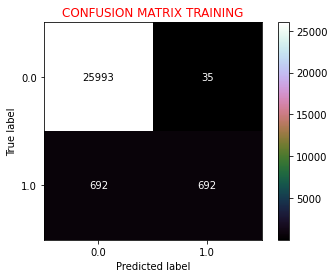

In [ ]:
plot_confusion_matrix(model,X_train,y_train,cmap='cubehelix')
plt.title('CONFUSION MATRIX TRAINING',color='red');

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     26028
         1.0       0.95      0.50      0.66      1384

    accuracy                           0.97     27412
   macro avg       0.96      0.75      0.82     27412
weighted avg       0.97      0.97      0.97     27412



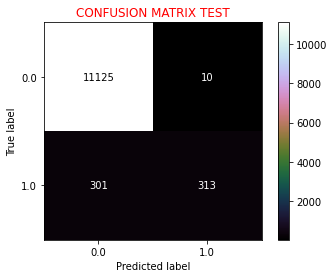

In [ ]:
plot_confusion_matrix(model,X_test,y_test,cmap='cubehelix')
plt.title('CONFUSION MATRIX TEST',color='red');

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     11135
         1.0       0.97      0.51      0.67       614

    accuracy                           0.97     11749
   macro avg       0.97      0.75      0.83     11749
weighted avg       0.97      0.97      0.97     11749



In [ ]:
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
ytest_predict_prob=LDA_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.999861,0.000139
1,0.999978,0.000022
2,0.999988,0.000012
3,0.999988,0.000012
4,0.999807,0.000193


In [ ]:
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))

0.971071063767693
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     26028
         1.0       0.93      0.46      0.62      1384

    accuracy                           0.97     27412
   macro avg       0.95      0.73      0.80     27412
weighted avg       0.97      0.97      0.97     27412



In [ ]:
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9714018214316112
[[11116    19]
 [  317   297]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     11135
         1.0       0.94      0.48      0.64       614

    accuracy                           0.97     11749
   macro avg       0.96      0.74      0.81     11749
weighted avg       0.97      0.97      0.97     11749



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9707427404056618
[[25978    50]
 [  752   632]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     26028
         1.0       0.93      0.46      0.61      1384

    accuracy                           0.97     27412
   macro avg       0.95      0.73      0.80     27412
weighted avg       0.97      0.97      0.97     27412



In [ ]:
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9710613669248447
[[11114    21]
 [  319   295]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     11135
         1.0       0.93      0.48      0.63       614

    accuracy                           0.97     11749
   macro avg       0.95      0.74      0.81     11749
weighted avg       0.97      0.97      0.97     11749



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [ ]:
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.975412228221217
[[25979    49]
 [  625   759]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     26028
         1.0       0.94      0.55      0.69      1384

    accuracy                           0.98     27412
   macro avg       0.96      0.77      0.84     27412
weighted avg       0.97      0.98      0.97     27412



In [ ]:
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9758277300195761
[[11116    19]
 [  265   349]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     11135
         1.0       0.95      0.57      0.71       614

    accuracy                           0.98     11749
   macro avg       0.96      0.78      0.85     11749
weighted avg       0.98      0.98      0.97     11749



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [ ]:
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9763607179337517
[[25987    41]
 [  607   777]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     26028
         1.0       0.95      0.56      0.71      1384

    accuracy                           0.98     27412
   macro avg       0.96      0.78      0.85     27412
weighted avg       0.98      0.98      0.97     27412



In [ ]:
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9762532981530343
[[11116    19]
 [  260   354]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     11135
         1.0       0.95      0.58      0.72       614

    accuracy                           0.98     11749
   macro avg       0.96      0.79      0.85     11749
weighted avg       0.98      0.98      0.97     11749

